In [1]:
#Hani Patel, Final release: 12/8/2018, Flight Delay Prediction Model, copyright@HaniPatel


#Importing data analysis libraries 
import pandas as pd
import numpy as np

#Importing data visualization and modeling libraries 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings, datetime, scipy 

#During ploting Piechart
from matplotlib.gridspec import GridSpec

#During modeling 
from matplotlib.gridspec import GridSpec
from sklearn import metrics
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from scipy.optimize import curve_fit
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

#To see visualization 
%matplotlib inline
warnings.filterwarnings("ignore")


In [2]:
#Reading flights.csv file
df = pd.read_csv('C:/Users/hanip/Desktop/Project/flights.csv')

FileNotFoundError: File b'C:/Users/hanip/Desktop/Project/flights.csv' does not exist

In [ ]:
df.head()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 31 columns):
YEAR                   1048575 non-null int64
MONTH                  1048575 non-null int64
DAY                    1048575 non-null int64
DAY_OF_WEEK            1048575 non-null int64
AIRLINE                1048575 non-null object
FLIGHT_NUMBER          1048575 non-null int64
TAIL_NUMBER            1040825 non-null object
ORIGIN_AIRPORT         1048575 non-null object
DESTINATION_AIRPORT    1048575 non-null object
SCHEDULED_DEPARTURE    1048575 non-null int64
DEPARTURE_TIME         1009060 non-null float64
DEPARTURE_DELAY        1009060 non-null float64
TAXI_OUT               1008346 non-null float64
WHEELS_OFF             1008346 non-null float64
SCHEDULED_TIME         1048573 non-null float64
ELAPSED_TIME           1005504 non-null float64
AIR_TIME               1005504 non-null float64
DISTANCE               1048575 non-null int64
WHEELS_ON              1007279 non-null f

In [5]:
df.describe()

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,...,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
count,1048575.0,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.009060e+06,1.009060e+06,1.008346e+06,1.008346e+06,...,1.048575e+06,1.007279e+06,1.005504e+06,1.048575e+06,1.048575e+06,228528.000000,228528.000000,228528.000000,228528.000000,228528.000000
mean,2015.0,1.694297e+00,1.382097e+01,3.953196e+00,2.256759e+03,1.322632e+03,1.333705e+03,1.133485e+01,1.665380e+01,1.357382e+03,...,1.504820e+03,1.492204e+03,7.612191e+00,2.426150e-03,3.864960e-02,13.692554,0.057328,18.203577,22.921458,3.545277
std,0.0,7.051508e-01,8.725656e+00,1.999436e+00,1.799166e+03,4.707748e+02,4.827415e+02,3.922372e+01,1.007006e+01,4.830351e+02,...,4.865613e+02,5.071090e+02,4.209367e+01,4.919620e-02,1.927585e-01,25.524897,1.779647,46.323146,41.888498,23.611555
min,2015.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-6.100000e+01,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,-8.200000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2015.0,1.000000e+00,6.000000e+00,2.000000e+00,7.550000e+02,9.200000e+02,9.280000e+02,-5.000000e+00,1.100000e+01,9.440000e+02,...,1.120000e+03,1.115000e+03,-1.200000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2015.0,2.000000e+00,1.300000e+01,4.000000e+00,1.725000e+03,1.319000e+03,1.329000e+03,-1.000000e+00,1.400000e+01,1.342000e+03,...,1.524000e+03,1.521000e+03,-3.000000e+00,0.000000e+00,0.000000e+00,4.000000,0.000000,2.000000,4.000000,0.000000
75%,2015.0,2.000000e+00,2.100000e+01,6.000000e+00,3.485000e+03,1.720000e+03,1.731000e+03,1.100000e+01,1.900000e+01,1.745000e+03,...,1.915000e+03,1.917000e+03,1.200000e+01,0.000000e+00,0.000000e+00,19.000000,0.000000,18.000000,29.000000,0.000000
max,2015.0,3.000000e+00,3.100000e+01,7.000000e+00,9.794000e+03,2.359000e+03,2.400000e+03,1.988000e+03,2.250000e+02,2.400000e+03,...,2.359000e+03,2.400000e+03,1.971000e+03,1.000000e+00,1.000000e+00,830.000000,241.000000,1971.000000,1313.000000,1152.000000


In [6]:
df.columns


Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY'],
      dtype='object')

In [3]:
#df.shape:-Return a tuple representing the dimensionality of the DataFrame.
print('Dataframe dimensions:', df.shape) 


# gives some information on columns types and number of null values
tab_info=pd.DataFrame(df.dtypes).T.rename(index={0:'column type'})
tab_info=tab_info.append(pd.DataFrame(df.isnull().sum()).T.rename(index={0:'null values (total)'}))
tab_info=tab_info.append(pd.DataFrame(df.isnull().sum()/df.shape[0]*100)
                         .T.rename(index={0:'null values (total%)'}))
tab_info

NameError: name 'df' is not defined

In [4]:
#Missing values (%) for every columns
missing_df = df.isnull().sum(axis=0).reset_index()
missing_df.columns = ['variable', 'missing values']
missing_df['filling factor (%)']=(df.shape[0]-missing_df['missing values'])/df.shape[0]*100
missing_df.sort_values('filling factor (%)').reset_index(drop = True)

,variable,missing values,filling factor (%)
0,CANCELLATION_REASON,1008048,3.864960
1,WEATHER_DELAY,820047,21.794149
2,AIRLINE_DELAY,820047,21.794149
3,SECURITY_DELAY,820047,21.794149
4,AIR_SYSTEM_DELAY,820047,21.794149
5,LATE_AIRCRAFT_DELAY,820047,21.794149
6,ARRIVAL_DELAY,43071,95.892425
7,AIR_TIME,43071,95.892425
8,ELAPSED_TIME,43071,95.892425
9,TAXI_IN,41296,96.061703


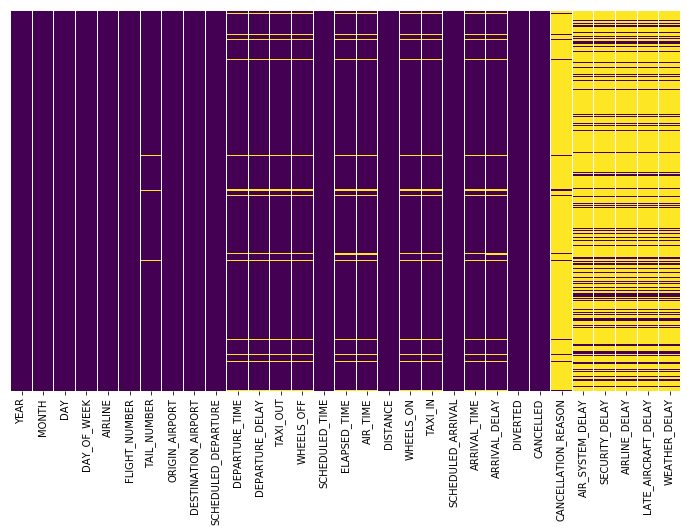

In [9]:
#Visualizing missing values using heatmap
plt.figure(figsize=(12,7))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [5]:
#Reading airports.csv file
airports = pd.read_csv("C:\\Users\\hanip\\Desktop\\Project\\airports.csv")


In [11]:
airports.head()

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447


In [6]:
#Number of unique airports
airports['AIRPORT'].nunique()

322

In [7]:
#Reading airlines.csv file
airlines_names = pd.read_csv("C:\\Users\\hanip\\Desktop\\airlines.csv")


In [14]:
airlines_names.head()

,IATA_CODE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways


In [8]:
#Number of Airlines
airlines_names['AIRLINE'].nunique()

14

In [9]:
#Creating Dataframe for January 
df = df[df['MONTH'] == 1]
df

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5,2015,1,1,4,DL,806,N3730B,SFO,MSP,25,...,610.0,8.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
6,2015,1,1,4,NK,612,N635NK,LAS,MSP,25,...,509.0,-17.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
7,2015,1,1,4,US,2013,N584UW,LAX,CLT,30,...,753.0,-10.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
8,2015,1,1,4,AA,1112,N3LAAA,SFO,DFW,30,...,532.0,-13.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
9,2015,1,1,4,DL,1173,N826DN,LAS,ATL,30,...,656.0,-15.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
#combining columns/creating DATE column
df['DATE'] = pd.to_datetime(df[['YEAR','MONTH', 'DAY']])
df

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,DATE
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01
5,2015,1,1,4,DL,806,N3730B,SFO,MSP,25,...,8.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01
6,2015,1,1,4,NK,612,N635NK,LAS,MSP,25,...,-17.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01
7,2015,1,1,4,US,2013,N584UW,LAX,CLT,30,...,-10.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01
8,2015,1,1,4,AA,1112,N3LAAA,SFO,DFW,30,...,-13.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01
9,2015,1,1,4,DL,1173,N826DN,LAS,ATL,30,...,-15.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01


In [11]:
# Function that convert the 'HHMM' string to datetime.time
def real_datetime(x):
    if pd.isnull(x):
        return np.nan
    else:
        if x == 2400: x = 0
        x = "{0:04d}".format(int(x))
        td = datetime.time(int(x[0:2]), int(x[2:4]))
        return td


# Function that combines a date and time to produce a datetime.datetime
def combine_datetime(y):
    if pd.isnull(y[0]) or pd.isnull(y[1]):
        return np.nan
    else:
        return datetime.datetime.combine(y[0],y[1])

    
# Function that combine two columns of the dataframe to create a datetime format
def final_datetime(df, col):    
    liste = []
    for index, cols in df[['DATE', col]].iterrows():    
        if pd.isnull(cols[1]):
            liste.append(np.nan)
        elif float(cols[1]) == 2400:
            cols[0] += datetime.timedelta(days=1)
            cols[1] = datetime.time(0,0)
            liste.append(combine_datetime(cols))
        else:
            cols[1] = real_datetime(cols[1])
            liste.append(combine_datetime(cols))
    return pd.Series(liste)

In [12]:
#Final datetime columns 
df['SCHEDULED_DEPARTURE'] = final_datetime(df, 'SCHEDULED_DEPARTURE')
df['DEPARTURE_TIME'] = df['DEPARTURE_TIME'].apply(real_datetime)
df['SCHEDULED_ARRIVAL'] = df['SCHEDULED_ARRIVAL'].apply(real_datetime)
df['ARRIVAL_TIME'] = df['ARRIVAL_TIME'].apply(real_datetime)
#__________________________________________________________________________
df.loc[:5, ['SCHEDULED_DEPARTURE', 'SCHEDULED_ARRIVAL', 'DEPARTURE_TIME',
             'ARRIVAL_TIME', 'DEPARTURE_DELAY', 'ARRIVAL_DELAY']]

,SCHEDULED_DEPARTURE,SCHEDULED_ARRIVAL,DEPARTURE_TIME,ARRIVAL_TIME,DEPARTURE_DELAY,ARRIVAL_DELAY
0,2015-01-01 00:05:00,04:30:00,23:54:00,04:08:00,-11.0,-22.0
1,2015-01-01 00:10:00,07:50:00,00:02:00,07:41:00,-8.0,-9.0
2,2015-01-01 00:20:00,08:06:00,00:18:00,08:11:00,-2.0,5.0
3,2015-01-01 00:20:00,08:05:00,00:15:00,07:56:00,-5.0,-9.0
4,2015-01-01 00:25:00,03:20:00,00:24:00,02:59:00,-1.0,-21.0
5,2015-01-01 00:25:00,06:02:00,00:20:00,06:10:00,-5.0,8.0


In [13]:
#Removig misssing value variables  
variables_to_remove = ['YEAR','MONTH','DAY','DATE', 'AIR_SYSTEM_DELAY',
                       'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY',
                       'WEATHER_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON',
                       'TAXI_OUT', 'TAXI_IN', 'WHEELS_ON', 'WHEELS_OFF', 
                       'FLIGHT_NUMBER', 'TAIL_NUMBER', 'AIR_TIME']
df.drop(variables_to_remove, axis = 1, inplace = True)

#Final variable inputs
df = df[['AIRLINE', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'DAY_OF_WEEK',
        'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY',
        'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME', 'ARRIVAL_DELAY',
        'SCHEDULED_TIME', 'ELAPSED_TIME']]

#Final Flights info. Dataframe
df[:5]
print('Dataframe dimensions:', df.shape) 

Dataframe dimensions: (469968, 12)


In [14]:
#Missing values (%) for final variables
missing_df = df.isnull().sum(axis=0).reset_index()
missing_df.columns = ['variable', 'missing values']
missing_df['filling factor (%)']=(df.shape[0]-missing_df['missing values'])/df.shape[0]*100
missing_df.sort_values('filling factor (%)').reset_index(drop = True)

,variable,missing values,filling factor (%)
0,ARRIVAL_DELAY,12955,97.243429
1,ELAPSED_TIME,12955,97.243429
2,ARRIVAL_TIME,12271,97.388971
3,DEPARTURE_TIME,11657,97.519618
4,DEPARTURE_DELAY,11657,97.519618
5,AIRLINE,0,100.000000
6,ORIGIN_AIRPORT,0,100.000000
7,DESTINATION_AIRPORT,0,100.000000
8,DAY_OF_WEEK,0,100.000000
9,SCHEDULED_DEPARTURE,0,100.000000


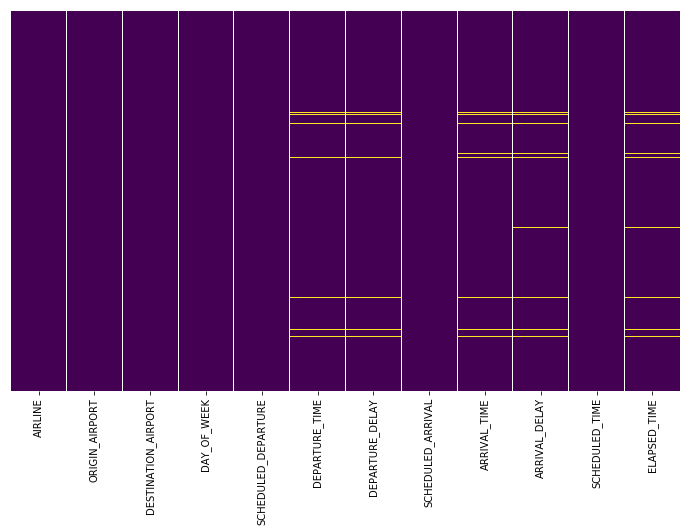

In [24]:
#Visualizing missing values using heatmap
plt.figure(figsize=(12,7))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [15]:
abbr_companies = airlines_names.set_index('IATA_CODE')['AIRLINE'].to_dict()
abbr_companies

{'UA': 'United Air Lines Inc.',
 'AA': 'American Airlines Inc.',
 'US': 'US Airways Inc.',
 'F9': 'Frontier Airlines Inc.',
 'B6': 'JetBlue Airways',
 'OO': 'Skywest Airlines Inc.',
 'AS': 'Alaska Airlines Inc.',
 'NK': 'Spirit Air Lines',
 'WN': 'Southwest Airlines Co.',
 'DL': 'Delta Air Lines Inc.',
 'EV': 'Atlantic Southeast Airlines',
 'HA': 'Hawaiian Airlines Inc.',
 'MQ': 'American Eagle Airlines Inc.',
 'VX': 'Virgin America'}

In [16]:
# function that extract statistical parameters from a grouby objet
def get_cals(vals):
    return {'min': vals.min(), 'max': vals.max(),
            'count': vals.count(), 'mean': vals.mean()}

# Creation of a dataframe with statitical infos on each airline
global_cals = df['DEPARTURE_DELAY'].groupby(df['AIRLINE']).apply(get_cals).unstack()
global_cals = global_cals.sort_values('count')
global_cals

,count,max,mean,min
AIRLINE,,,,
VX,4651.0,397.0,6.910772,-20.0
HA,6418.0,1003.0,1.310065,-26.0
F9,6745.0,696.0,17.984433,-32.0
NK,8647.0,557.0,13.146294,-28.0
AS,13198.0,538.0,3.178209,-47.0
B6,20531.0,500.0,10.035556,-27.0
MQ,27670.0,780.0,16.081207,-29.0
US,32552.0,638.0,5.197315,-26.0
UA,37454.0,886.0,14.010359,-40.0


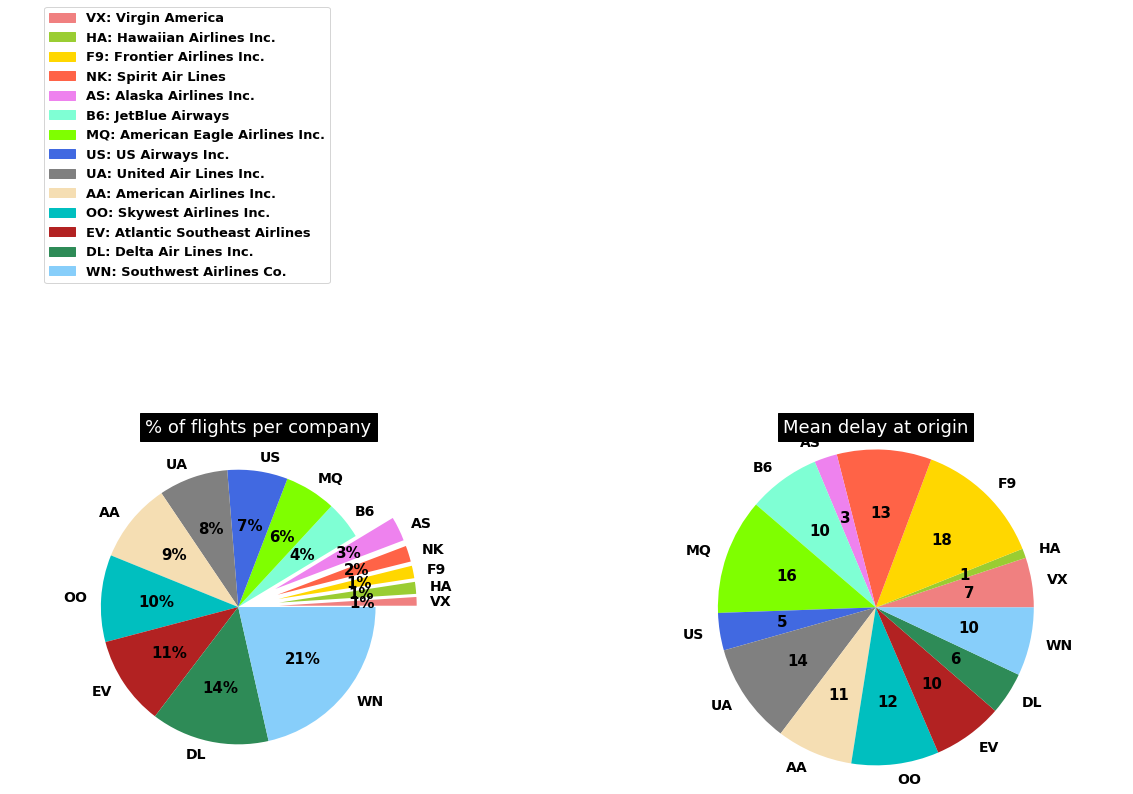

In [17]:
font = {'family' : 'normal', 'weight' : 'bold', 'size'   : 15}
mpl.rc('font', **font)

#import matplotlib.patches as mpatches
import matplotlib.patches as mpatches

#redefine the airlines labeling 
df2 = df.loc[:, ['AIRLINE', 'DEPARTURE_DELAY']]
df2['AIRLINE'] = df2['AIRLINE'].replace(abbr_companies)

#Colors
colors = ['lightcoral', 'yellowgreen', 'gold', 'tomato', 'violet', 'aquamarine', 'chartreuse',
             'royalblue', 'grey', 'wheat', 'c', 'firebrick', 'seagreen', 'lightskyblue',]
#Ploting
fig = plt.figure(1, figsize=(16,16))
gs=GridSpec(2,2)             
ax1=fig.add_subplot(gs[0,0]) 
ax2=fig.add_subplot(gs[0,1]) 


# Pie chart1: nb of flights
labels = [s for s in  global_cals.index]
sizes  = global_cals['count'].values
explode = [0.3 if sizes[i] < 20000 else 0.0 for i in range(len(abbr_companies))]
patches, texts, autotexts = ax1.pie(sizes, explode = explode,
                                labels=labels, colors = colors,  autopct='%1.0f%%',
                                shadow=False, startangle=0)
for i in range(len(abbr_companies)): 
    texts[i].set_fontsize(14)
ax1.axis('equal')
ax1.set_title('% of flights per company', bbox={'facecolor':'black', 'pad':5},
              color = 'w',fontsize=18)

#legend: abreviation -> airline name
comp_handler = []
for i in range(len(abbr_companies)):
    comp_handler.append(mpatches.Patch(color=colors[i],
            label = global_cals.index[i] + ': ' + abbr_companies[global_cals.index[i]]))
ax1.legend(handles=comp_handler, bbox_to_anchor=(0.3, 1), 
           fontsize = 13, bbox_transform=plt.gcf().transFigure)


# Pie chart2: mean delay at departure
sizes  = global_cals['mean'].values
sizes  = [max(s,0) for s in sizes]
explode = [0.0 if sizes[i] < 20000 else 0.01 for i in range(len(abbr_companies))]
patches, texts, autotexts = ax2.pie(sizes, explode = explode, labels = labels,
                                colors = colors, shadow=False, startangle=0,
                                autopct = lambda p :  '{:.0f}'.format(p * sum(sizes) / 100))
for i in range(len(abbr_companies)): 
    texts[i].set_fontsize(14)
ax2.axis('equal')
ax2.set_title('Mean delay at origin', bbox={'facecolor':'black', 'pad':5},
              color='w', fontsize=18)

plt.tight_layout(w_pad=2) 

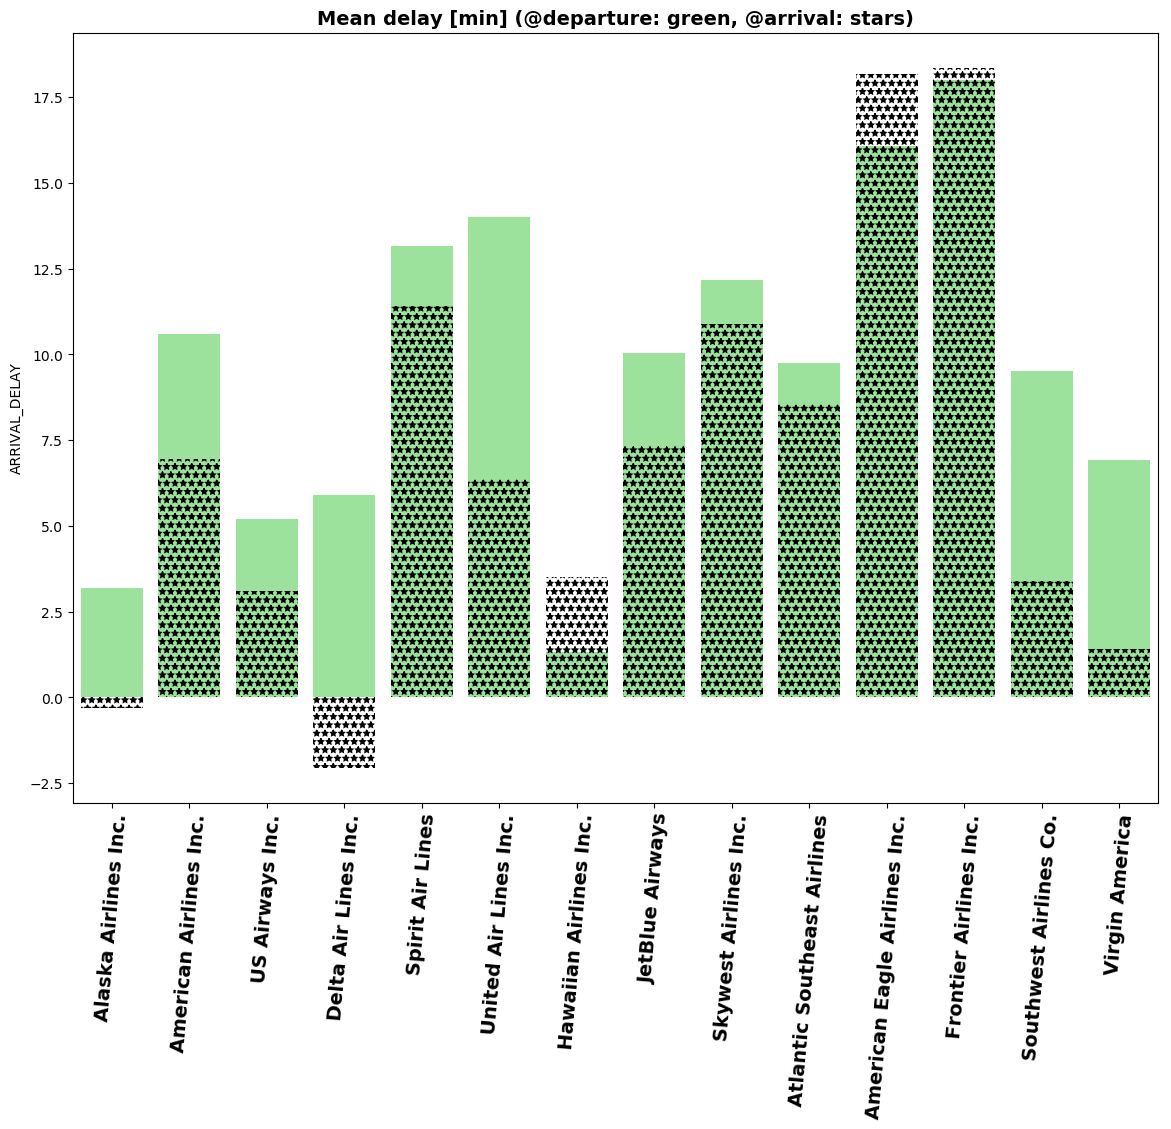

In [20]:
mpl.rcParams.update(mpl.rcParamsDefault)
mpl.rcParams['lines.dashed_pattern'] = [1, 3]

fig = plt.figure(1, figsize=(14,10))
ax = sns.barplot(y="DEPARTURE_DELAY", x="AIRLINE", data=df, color="lightgreen", ci=None)
ax = sns.barplot(y="ARRIVAL_DELAY", x="AIRLINE", data=df, color="r", hatch = '**',
                 alpha = 0.0, ci=None)
labels = [abbr_companies[item.get_text()] for item in ax.get_xticklabels()]
ax.set_xticklabels(labels,fontsize=14, weight = 'bold', rotation = 85)
ax.xaxis.label.set_visible(False)
ax.set_title('Mean delay [min] (@departure: green, @arrival: stars)',
           fontsize=14, weight = 'bold');

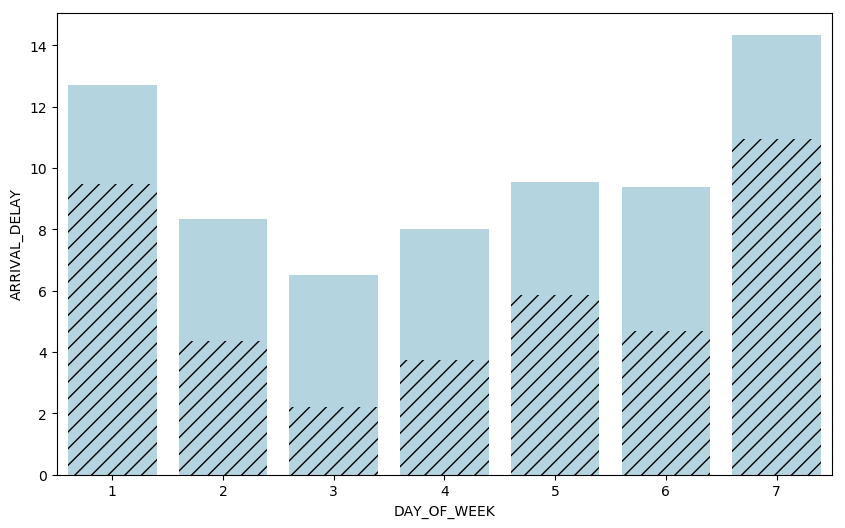

In [19]:
mpl.rcParams.update(mpl.rcParamsDefault)
mpl.rcParams['lines.dashed_pattern'] = [1, 3]

fig1 = plt.figure(1, figsize=(10,6))
ax1 = sns.barplot(y="DEPARTURE_DELAY", x="DAY_OF_WEEK", data=df, color="lightblue", ci=None)
ax1 = sns.barplot(y="ARRIVAL_DELAY", x="DAY_OF_WEEK", data=df, color="r", hatch = '//',
                 alpha = 0.0, ci=None)



In [27]:

def func2(x, a, b, c):
    return a * x**2 +  b*x + c
#_______________________________
df2['heure_depart'] =  df2['SCHEDULED_DEPARTURE'].apply(lambda x:x.time())
test2 = df2['DEPARTURE_DELAY'].groupby(df2['heure_depart']).apply(get_cals).unstack()
fct = lambda x:x.hour*3600+x.minute*60+x.second
x_val = np.array([fct(s) for s in test2.index]) 
y_val = test2['mean']
popt, pcov = curve_fit(func2, x_val, y_val, p0 = [1, 2, 3])
test2['fit'] = pd.Series(func2(x_val, *popt), index = test2.index)

KeyError: 'SCHEDULED_DEPARTURE'

In [28]:
fig1 = Figure_style(8, 4, 1, 1)
fig1.pos_update(0, 0)
fig1.cust_plot_date(df2['heure_depart'], df2['DEPARTURE_DELAY'],
                    markeredge=False, label='initial data points')
fig1.cust_plot(test2.index, test2['mean'], linestyle='--', linewidth=2, label='mean')
fig1.cust_plot(test2.index, test2['fit'], color='r', linestyle='-', linewidth=3, label='fit')
fig1.style() ; fig1.draw_legend('upper left')
fig1.set_ylabel('Delay (minutes)', fontsize = 14)
fig1.set_xlabel('Departure time', fontsize = 14)
fig1.set_ylim(-15, 210)



mpl.rcParams.update(mpl.rcParamsDefault)
mpl.rcParams['lines.dashed_pattern'] = [1, 3]

fig1 = plt.figure(1, figsize=(10,6))
ax1 = sns.barplot(y=df2['heure_depart'], x=df2['DEPARTURE_DELAY'], data=df, color="lightblue", ci=None)
ax1 = sns.barplot(y="ARRIVAL_DELAY", x="DAY_OF_WEEK", data=df, color="r", hatch = '//',
                 alpha = 0.0, ci=None)



NameError: name 'Figure_style' is not defined

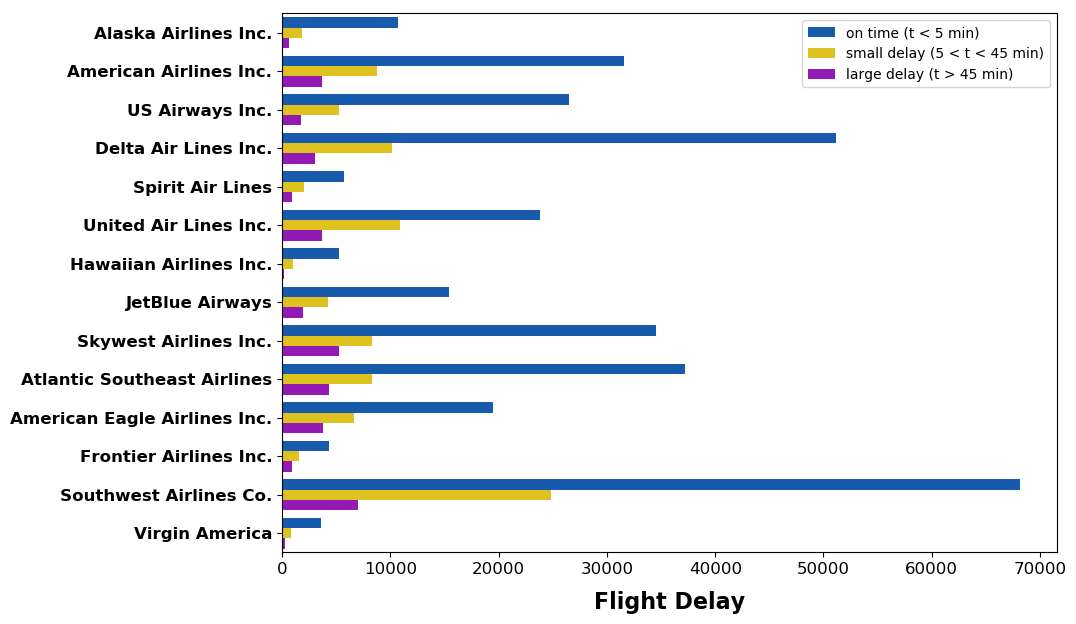

In [29]:
# Function that define how delays are grouped
delay = lambda x:((0,1)[x > 5],2)[x > 45]
df['DELAY_TIME'] = df['DEPARTURE_DELAY'].apply(delay)

#Ploting
fig = plt.figure(1, figsize=(10,7))
ax = sns.countplot(y="AIRLINE", hue='DELAY_TIME', data=df, palette='prism')


# replace the abbreviations by the full names of the companies and set the labels
labels = [abbr_companies[item.get_text()] for item in ax.get_yticklabels()]
ax.set_yticklabels(labels)
plt.setp(ax.get_xticklabels(), fontsize=12, weight = 'normal', rotation = 0);
plt.setp(ax.get_yticklabels(), fontsize=12, weight = 'bold', rotation = 0);
ax.yaxis.label.set_visible(False)
plt.xlabel('Flight Delay', fontsize=16, weight = 'bold', labelpad=10)


# legend
L = plt.legend()
L.get_texts()[0].set_text('on time (t < 5 min)')
L.get_texts()[1].set_text('small delay (5 < t < 45 min)')
L.get_texts()[2].set_text('large delay (t > 45 min)')
plt.show()

In [31]:
df_train = df[df['SCHEDULED_DEPARTURE'].apply(lambda x:x.date()) < datetime.date(2015, 1, 23)]
df_test  = df[df['SCHEDULED_DEPARTURE'].apply(lambda x:x.date()) > datetime.date(2015, 1, 23)]
df = df_train

In [35]:
carrier = 'AIRLINE'
check_airports = df[(df['AIRLINE'] == carrier)]['DEPARTURE_DELAY'].groupby(
                         df['ORIGIN_AIRPORT']).apply(get_cals).unstack()
check_airports.sort_values('count', ascending = False, inplace = True)
check_airports[-5:]

AttributeError: 'Index' object has no attribute 'remove_unused_levels'

In [76]:
def get_flight_delays(df, carrier, id_airport, extrem_values = False):
    df2 = df[(df['AIRLINE'] == carrier) & (df['ORIGIN_AIRPORT'] == id_airport)]

    # remove extreme values before fitting
    if extrem_values:
        df2['DEPARTURE_DELAY'] = df2['DEPARTURE_DELAY'].apply(lambda x:x if x < 60 else np.nan)
        df2.dropna(how = 'any')
    
    # Conversion: date + heure -> heure
    df2.sort_values('SCHEDULED_DEPARTURE', inplace = True)
    df2['heure_depart'] =  df2['SCHEDULED_DEPARTURE'].apply(lambda x:x.time())

    # regroupement des vols par heure de départ et calcul de la moyenne
    test2 = df2['DEPARTURE_DELAY'].groupby(df2['heure_depart']).apply(get_cals).unstack()
    test2.reset_index(inplace=True)

    # conversion de l'heure en secondes
    fct = lambda x:x.hour*3600+x.minute*60+x.second
    test2.reset_index(inplace=True)
    test2['heure_depart_min'] = test2['heure_depart'].apply(fct)
    return test2

In [77]:
class fit_polynome:

    def __init__(self, data):
        self.data = data[['mean', 'heure_depart_min']].dropna(how='any', axis = 0)

    def split(self, method):        
        self.method = method        
        self.X = np.array(self.data['heure_depart_min'])
        self.Y = np.array(self.data['mean'])
        self.X = self.X.reshape(len(self.X),1)
        self.Y = self.Y.reshape(len(self.Y),1)

        if method == 'all':
            self.X_train = self.X
            self.Y_train = self.Y
            self.X_test  = self.X
            self.Y_test  = self.Y                        
        elif method == 'split':            
            self.X_train, self.X_test, self.Y_train, self.Y_test = \
                train_test_split(self.X, self.Y, test_size=0.3)
    
    def train(self, pol_order):
        self.poly = PolynomialFeatures(degree = pol_order)
        self.regr = linear_model.LinearRegression()
        self.X_ = self.poly.fit_transform(self.X_train)
        self.regr.fit(self.X_, self.Y_train)
    
    def predict(self, X):
        self.X_ = self.poly.fit_transform(X)
        self.result = self.regr.predict(self.X_)
    
    def calc_score(self):        
        X_ = self.poly.fit_transform(self.X_test)
        result = self.regr.predict(X_)
        self.score = metrics.mean_squared_error(result, self.Y_test)

modèle nº1 , min. pour n = 1, score = 50.4
modèle nº2 , min. pour n = 3, score = 53.9
modèle nº3 , min. pour n = 3, score = 64.3
modèle nº4 , min. pour n = 1, score = 86.2
modèle nº5 , min. pour n = 3, score = 50.4
modèle nº6 , min. pour n = 3, score = 73.1
modèle nº7 , min. pour n = 1, score = 89.7
modèle nº8 , min. pour n = 1, score = 98.7
modèle nº9 , min. pour n = 3, score = 101.1
modèle nº10, min. pour n = 1, score = 80.1
modèle nº11, min. pour n = 3, score = 78.7
modèle nº12, min. pour n = 3, score = 78.0
modèle nº13, min. pour n = 3, score = 101.3
modèle nº14, min. pour n = 3, score = 37.0
modèle nº15, min. pour n = 3, score = 46.1
modèle nº16, min. pour n = 3, score = 52.3
modèle nº17, min. pour n = 3, score = 89.7
modèle nº18, min. pour n = 3, score = 78.6
modèle nº19, min. pour n = 3, score = 53.4
modèle nº20, min. pour n = 3, score = 81.5
modèle nº21, min. pour n = 3, score = 49.3
modèle nº22, min. pour n = 3, score = 125.0
modèle nº23, min. pour n = 3, score = 49.0
modèle n

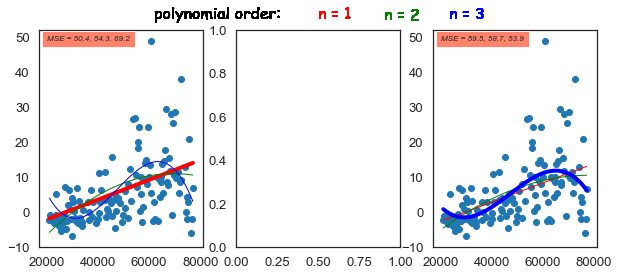

In [78]:
fig = plt.figure(1, figsize=(10,4))

ax = ['_' for _ in range(4)]
ax[1]=fig.add_subplot(131) 
ax[2]=fig.add_subplot(132) 
ax[3]=fig.add_subplot(133) 

id_airport = 'BNA'
test2 = get_flight_delays(df, carrier, id_airport, True)

result = ['_' for _ in range(4)]
score = [10000 for _ in range(4)]
found = [False for _ in range(4)]
fit = fit_polynome(test2)

color = '.rgbyc'

inc = 0
while True:
    inc += 1
    fit.split('split')
    for i in range(1,4):
        fit.train(pol_order = i)
        fit.predict(fit.X)
        result[i] = fit.result
        fit.calc_score()
        score[i]  = fit.score

    [ind_min] = [j for j,val in enumerate(score) if min(score) == val]
    print("modèle nº{:<2}, min. pour n = {}, score = {:.1f}".format(inc, ind_min,score[ind_min]))
    
    if not found[ind_min]:            
        for i in range(1,4):
            ax[ind_min].plot(fit.X, result[i], color[i], linewidth = 4 if i == ind_min else 1)
        ax[ind_min].scatter(fit.X, fit.Y)                
        ax[ind_min].text(0.05, 0.95, 'MSE = {:.1f}, {:.1f}, {:.1f}'.format(*score[1:4]),
                         style='italic', transform=ax[ind_min].transAxes, fontsize = 8,
                         bbox={'facecolor':'tomato', 'alpha':0.8, 'pad':5})                
        found[ind_min] = True

    shift = 0.5
    plt.text(-1+shift, 1.05, "polynomial order:", color = 'k',
                transform=ax[2].transAxes, fontsize = 16, family='fantasy')
    plt.text(0+shift, 1.05, "n = 1", color = 'r', 
                transform=ax[2].transAxes, fontsize = 16, family='fantasy')
    plt.text(0.4+shift, 1.05, "n = 2", color = 'g', 
                transform=ax[2].transAxes, fontsize = 16, family='fantasy')
    plt.text(0.8+shift, 1.05, "n = 3", color = 'b',
                transform=ax[2].transAxes, fontsize = 16, family='fantasy')
   
    if inc == 40 or all(found[1:4]): break

In [79]:
def create_df(df, carrier):
    df2 = df[df['AIRLINE'] == carrier][['SCHEDULED_DEPARTURE','SCHEDULED_ARRIVAL',
                                    'ORIGIN_AIRPORT','DESTINATION_AIRPORT','DEPARTURE_DELAY']]
    df2.dropna(how = 'any', inplace = True)
    df2['weekday'] = df2['SCHEDULED_DEPARTURE'].apply(lambda x:x.weekday())

    # delete delays > 1h
    df2['DEPARTURE_DELAY'] = df2['DEPARTURE_DELAY'].apply(lambda x:x if x < 60 else np.nan)
    df2.dropna(how = 'any', inplace = True)

    # formating times
    fct = lambda x:x.hour*3600+x.minute*60+x.second
    df2['heure_depart'] = df2['SCHEDULED_DEPARTURE'].apply(lambda x:x.time())
    df2['heure_depart'] = df2['heure_depart'].apply(fct)
    df2['heure_arrivee'] = df2['SCHEDULED_ARRIVAL'].apply(fct)
    df3 = df2.groupby(['heure_depart', 'heure_arrivee', 'ORIGIN_AIRPORT'],
                      as_index = False).mean()
    return df3


In [80]:
df3 = create_df(df, carrier)    
df3[:5]

,heure_depart,heure_arrivee,ORIGIN_AIRPORT,DEPARTURE_DELAY,weekday
0,19200,26700,LAS,-2.428571,2.142857
1,19500,27000,LAS,-3.500000,1.500000
2,19800,25500,MSP,1.500000,2.000000
3,19800,25800,ALB,-0.384615,2.000000
4,19800,27000,MHT,-3.000000,5.000000


In [90]:
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(df3['ORIGIN_AIRPORT'])

zipped = zip(integer_encoded, df3['ORIGIN_AIRPORT'])
label_airports = list(set(list(zipped)))
label_airports.sort(key = lambda x:x[0])

onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)

b = np.array(df3[['heure_depart', 'heure_arrivee']])
X = np.hstack((onehot_encoded, b))
Y = np.array(df3['DEPARTURE_DELAY'])
Y = Y.reshape(len(Y), 1)

In [91]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)


In [92]:
from sklearn.linear_model import Ridge
ridgereg = Ridge(alpha=0.3,normalize=True)
poly = PolynomialFeatures(degree = 2)
X_ = poly.fit_transform(X_train)
ridgereg.fit(X_, Y_train)


Ridge(alpha=0.3, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=None, solver='auto', tol=0.001)

In [93]:
score_min = 10000
for pol_order in range(1, 3):
    for alpha in range(0, 20, 2):
        ridgereg = Ridge(alpha = alpha/10, normalize=True)
        poly = PolynomialFeatures(degree = pol_order)
        regr = linear_model.LinearRegression()
        X_ = poly.fit_transform(X_train)
        ridgereg.fit(X_, Y_train)
        
        X_ = poly.fit_transform(X_test)
        result = ridgereg.predict(X_)
        score = metrics.mean_squared_error(result, Y_test)
        
        if score < score_min:
            score_min = score
            parameters = [alpha, pol_order]

        print("n={} alpha={} , MSE = {:<0.5}".format(pol_order, alpha/10, score))

n=1 alpha=0.0 , MSE = 105.14
n=1 alpha=0.2 , MSE = 105.85
n=1 alpha=0.4 , MSE = 107.08
n=1 alpha=0.6 , MSE = 108.42
n=1 alpha=0.8 , MSE = 109.79
n=1 alpha=1.0 , MSE = 111.13
n=1 alpha=1.2 , MSE = 112.4
n=1 alpha=1.4 , MSE = 113.62
n=1 alpha=1.6 , MSE = 114.76
n=1 alpha=1.8 , MSE = 115.83
n=2 alpha=0.0 , MSE = 109.98
n=2 alpha=0.2 , MSE = 104.74
n=2 alpha=0.4 , MSE = 105.19
n=2 alpha=0.6 , MSE = 105.64
n=2 alpha=0.8 , MSE = 106.1
n=2 alpha=1.0 , MSE = 106.56
n=2 alpha=1.2 , MSE = 107.04
n=2 alpha=1.4 , MSE = 107.52
n=2 alpha=1.6 , MSE = 108.01
n=2 alpha=1.8 , MSE = 108.5


In [94]:
ridgereg = Ridge(alpha = parameters[0], normalize=True)
poly = PolynomialFeatures(degree = parameters[1])
X_ = poly.fit_transform(X)
ridgereg.fit(X_, Y)
result = ridgereg.predict(X_)
score = metrics.mean_squared_error(result, Y)        
print(score)

102.58479731872502


In [95]:
X_ = poly.fit_transform(X_test)
result = ridgereg.predict(X_)
score = metrics.mean_squared_error(result, Y_test)
print('MSE = {}'.format(round(score, 2)))

MSE = 106.72


In [99]:
'Ecart = {:.2f} min'.format(np.sqrt(score))


'Ecart = 10.33 min'

In [100]:
lm = linear_model.LinearRegression()
model = lm.fit(X,Y)
predictions = lm.predict(X)
print("MSE =", metrics.mean_squared_error(predictions, Y))

MSE = 99.5264542938773


In [101]:
icount = 0
for i, val in enumerate(Y_test):
    if abs(val-predictions[i]) > 15: icount += 1
print("ecarts > 15 minutes: {}%".format(round((icount / len(predictions))*100,3)))

ecarts > 15 minutes: 6.097%


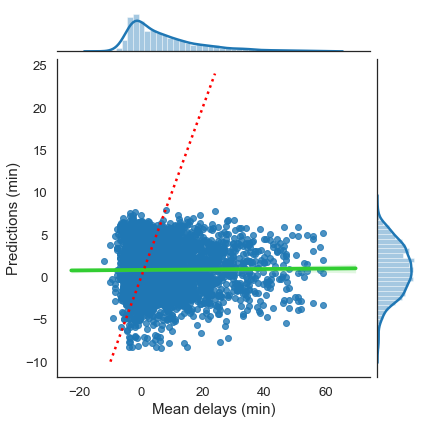

In [103]:
tips = pd.DataFrame()
tips["prediction"] = pd.Series([float(s) for s in predictions]) 
tips["original_data"] = pd.Series([float(s) for s in Y_test]) 
sns.jointplot(x="original_data", y="prediction", data=tips, size = 6, ratio = 7,
              joint_kws={'line_kws':{'color':'limegreen'}}, kind='reg')
plt.xlabel('Mean delays (min)', fontsize = 15)
plt.ylabel('Predictions (min)', fontsize = 15)
plt.plot(list(range(-10,25)), list(range(-10,25)), linestyle = ':', color = 'r')
plt.show()
